## TASK : Build an agent w/o memory - user query->groq->answer

In [1]:
from typing import TypedDict, List
from langgraph.graph import  StateGraph, START,END
from langchain_groq import ChatGroq
from langchain_core.messages import HumanMessage
import os
from dotenv import load_dotenv

load_dotenv()



True

## Create the structured class

In [2]:
class MyStateGraph(TypedDict):
    messages : List[HumanMessage]


## define the llm

In [3]:
groq_model = ChatGroq(
    model="llama-3.1-8b-instant",
    temperature=0.2,
    api_key=os.getenv("GROQ_API_KEY")
)

## build the node function

In [4]:
def ask_groq(MyStateGraph)->MyStateGraph:
    #response = groq_model.invoke(MyStateGraph["message"])
    MyStateGraph["messages"].append(groq_model.invoke(MyStateGraph["messages"]))
    print(MyStateGraph["messages"])
    return MyStateGraph

## Build the graph

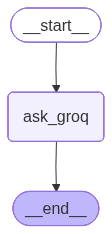

In [5]:
my_groq = StateGraph(MyStateGraph)
my_groq.add_node("ask_groq", ask_groq)
my_groq.add_edge(START, "ask_groq")
my_groq.add_edge("ask_groq", END)

app=my_groq.compile()
app


## invoke the graph

In [6]:
user_input = input("Enter: ")
while user_input != "exit":
    app.invoke({"messages": [HumanMessage(content=user_input)]})
    user_input = input("Enter: ")

AuthenticationError: Error code: 401 - {'error': {'message': 'Invalid API Key', 'type': 'invalid_request_error', 'code': 'invalid_api_key'}}